In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

cmapl = sns.cubehelix_palette(as_cmap=True)
sns.set(style="darkgrid")

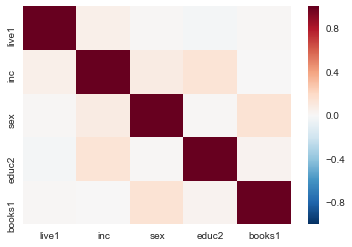

In [2]:
data = pd.read_csv("April_4_2016_Libraries.csv")

readers = pd.DataFrame(data)

focus_df = readers[['live1', 'inc', 'sex', 'educ2', 'books1', 'books2a']]
focus_df.corr()
sns.heatmap(focus_df.corr())
plt.show()

norms = readers[readers['books1']<=20]
nerds = readers[readers['books1']>20]

I thought it would be interesting to look at the data surrounding people who read more versus people who read less. As such, I isolated the data into two data frames (nerd/norm).

In [3]:
nerd_data = pd.DataFrame(nerds)
nerd_data

,psraid,sample,int_date,lang,form,llitext1,qs1,live1,reg,oftvote,...,birth_hisp,inc,hh1,hh3,zipcode,usr,cregion,state,weight,standwt
3,100009,1,32616,1,2,2,,3,1,1,...,,6,2,2,47940,R,2,18,2.46875,0.814155
16,100053,1,30716,1,1,1,,2,1,2,...,,5,2,2,43560,S,2,39,1.87500,0.618345
19,100084,1,30716,1,2,2,,3,1,2,...,,8,1,,47401,U,2,18,1.00000,0.329784
24,100108,1,31016,1,2,2,,4,1,1,...,,2,2,2,55616,R,2,27,2.46875,0.814155
26,100120,1,30716,1,1,1,,2,1,2,...,,99,1,,55303,S,2,27,1.03125,0.340090
36,100158,1,30716,1,1,1,,3,1,2,...,,3,2,2,99217,S,4,53,1.53125,0.504982
42,100186,1,30716,1,2,2,,3,1,1,...,,1,6,3,96793,U,4,15,1.40625,0.463759
48,100207,1,31016,1,2,2,,1,2,,...,,6,8,8,11207,U,1,36,2.21875,0.731709
50,100211,1,31016,1,2,1,,4,1,1,...,,7,2,2,56301,R,2,27,2.96875,0.979047
52,100219,1,31016,1,2,1,,3,1,2,...,,6,5,3,16803,S,1,42,5.28125,1.741673


In [4]:
norm_data = pd.DataFrame(norms)
norm_data

,psraid,sample,int_date,lang,form,llitext1,qs1,live1,reg,oftvote,...,birth_hisp,inc,hh1,hh3,zipcode,usr,cregion,state,weight,standwt
0,100001,1,31016,1,1,2,,2,1,1,...,,6,4,2,23464,U,3,51,6.93750,2.287878
1,100003,1,30716,1,2,1,,4,1,2,...,,2,1,,40962,R,3,21,6.93750,2.287878
2,100005,1,31016,1,1,2,,4,3,,...,,3,2,1,24237,R,3,51,2.03125,0.669874
4,100014,1,30716,1,2,2,,4,3,,...,,99,1,,49065,S,2,26,1.00000,0.329784
5,100016,1,31016,1,2,1,,2,1,1,...,,4,1,,7090,S,1,34,1.43750,0.474065
6,100017,1,31216,1,1,1,,1,3,,...,,4,3,1,23505,U,3,51,3.34375,1.102716
7,100019,1,31216,1,1,2,,2,1,2,...,,7,2,2,19055,S,1,42,1.21875,0.401924
8,100022,1,30716,1,2,2,,4,1,2,...,,6,4,3,14013,R,1,36,5.43750,1.793202
9,100026,1,30716,1,1,1,,3,1,2,...,,5,4,2,48103,U,2,26,3.28125,1.082104
10,100028,1,30716,1,2,1,,4,1,1,...,1,9,2,2,7840,S,1,34,1.06250,0.350396


These histograms show the distribution of how many people read a certain number of books:

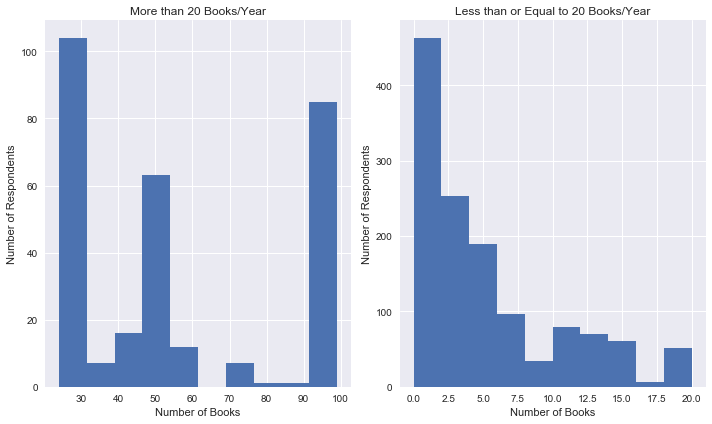

In [5]:
plt.figure(figsize=(10,6));

plt.subplot(1, 2, 1)
plt.hist(nerd_data['books1'].values)
plt.ylabel("Number of Respondents")
plt.xlabel("Number of Books")
plt.title("More than 20 Books/Year")


plt.subplot(1, 2, 2)
plt.hist(norm_data['books1'].values)
plt.ylabel("Number of Respondents")
plt.xlabel("Number of Books")
plt.title("Less than or Equal to 20 Books/Year")

plt.tight_layout()
plt.show()

In [6]:
a = nerd_data[nerd_data['live1']<5]
b = a[['books1', 'live1']]
c = norm_data[norm_data['live1']<5]
d = c[['books1', 'live1']]

b.groupby('live1').agg('count')
d.groupby('live1').agg('count')

,books1
live1,
1,295
2,292
3,479
4,226


I was curious to see if there was any difference between urban/rural environments and readership (1=city, 2=suburban, 3=small city and 4=rural). The scatterplots below show that there isn't much of a difference. The histograms on the sides of the jointplot, however, show that there is a lot of readership in #3 (small cities).

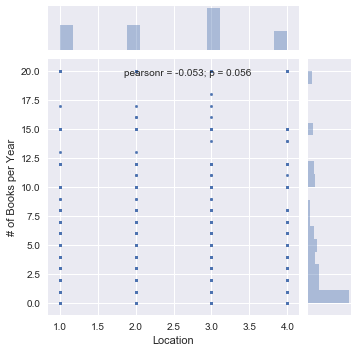

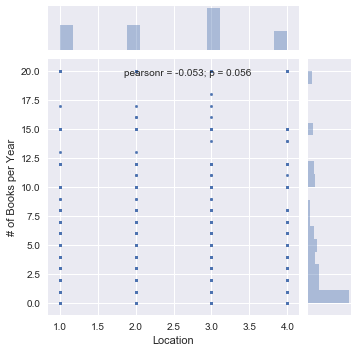

In [7]:
sns.jointplot(x = d['live1'], y = d['books1'], kind="scatter", size = 5, s = 7).set_axis_labels("Location", "# of Books per Year")


sns.jointplot(x = d['live1'], y = d['books1'], kind="scatter", size = 5, s = 7).set_axis_labels("Location", "# of Books per Year")

plt.show()


I also thought it ould be interesting to divide things up by gender to see if there were any trends.

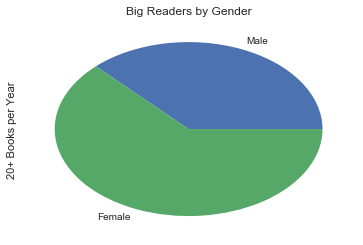

In [8]:
nerd_data.groupby('sex').agg('count').books2a.plot(kind="pie", y='sex', labels = ['Male', 'Female'])
plt.title("Big Readers by Gender")
plt.ylabel("20+ Books per Year")

plt.show()

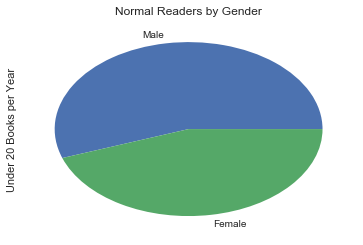

In [9]:
norm_data.groupby('sex').agg('count').loc[:, 'books1'].plot(kind='pie', y ='sex', labels = ['Male', 'Female'])
plt.title("Normal Readers by Gender")
plt.title("Normal Readers by Gender")
plt.ylabel("Under 20 Books per Year")

plt.show()


Then I took a look at how the variable "Education" was represented in each of the contexts.  From below, it looks as if those who read more than 20 books per year either had a four year degree or a post-graduate degree, although it is hard to say if this is always the case since the sample population is greater in those who read less than 20 books per year.


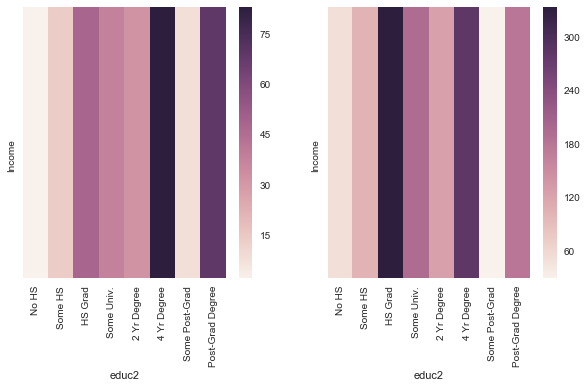

In [17]:
x = nerd_data.groupby('educ2').agg('count').drop(labels = [98, 99], axis=0)
x1 = x[['inc']].transpose()

y = norm_data.groupby('educ2').agg('count').drop(labels = [98, 99], axis=0)
y1 = y[['inc']].transpose()


plt.figure(figsize=(10,5))
plt.subplot(121)
sns.heatmap(x1, xticklabels = ['No HS', 'Some HS', 'HS Grad', 'Some Univ.', '2 Yr Degree', '4 Yr Degree', 'Some Post-Grad', 'Post-Grad Degree'], yticklabels = ['Income'])

plt.subplot(122)
sns.heatmap(y1,  xticklabels = ['No HS', 'Some HS', 'HS Grad', 'Some Univ.', '2 Yr Degree', '4 Yr Degree', 'Some Post-Grad', 'Post-Grad Degree'], yticklabels = ['Income'])
plt.show()